In [6]:
import pandas as pd
df = pd.read_csv("/content/crop_recommendation_large.csv")
print(df.shape)
df.head()


(2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,102,38,142,30.49,72.34,4.14,219.94,apple
1,92,107,109,37.98,62.69,6.37,101.93,papaya
2,14,110,179,27.27,95.52,4.75,110.25,grapes
3,106,24,45,13.78,51.70,5.38,142.64,pigeonpeas
4,71,127,24,27.45,75.51,5.39,106.09,maize


In [7]:
print(df.info())
print(df.isnull().sum())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     74.512727    76.480909   100.543636    24.885818    59.134782   
std      44.357705    43.003692   

In [8]:
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("After:", df.duplicated().sum())


Duplicates before: 0
After: 0


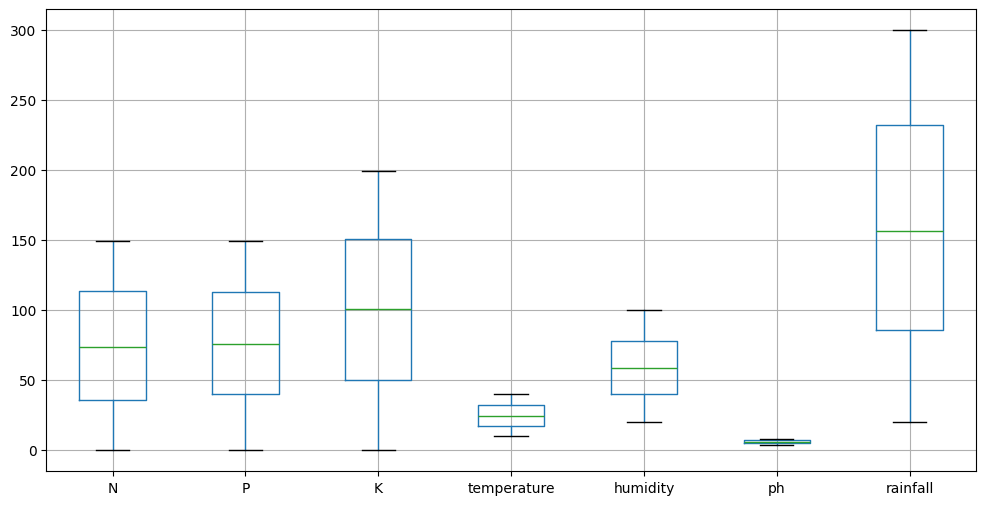

In [9]:
import matplotlib.pyplot as plt

df.boxplot(figsize=(12,6))
plt.show()


In [10]:
# Cap rainfall above 500 mm
df["rainfall"] = df["rainfall"].clip(upper=500)


In [11]:
X = df.drop("label", axis=1)
y = df["label"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (1760, 7) Test size: (440, 7)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:5])

[[ 1.53533436  1.62171572 -0.31144259  1.45358559  0.22005317  0.53116583
  -0.97947408]
 [-0.58411757  0.80549812  0.61687806 -0.57946657  0.18809668  0.65351835
   0.22176642]
 [ 1.44514491  0.6888956   1.40766973  1.09901024 -0.59971957  1.09049161
  -1.21036916]
 [ 0.45306103  1.20194666  0.35901121 -1.05376865  1.7797074  -1.31286135
   1.13215971]
 [-1.64384353  0.31576756  0.34182009  0.59247403  0.82633879 -0.30782284
   1.11799586]]


In [14]:
pd.DataFrame(X_train_scaled[:5], columns=X.columns).head()


,N,P,K,temperature,humidity,ph,rainfall
0,1.535334,1.621716,-0.311443,1.453586,0.220053,0.531166,-0.979474
1,-0.584118,0.805498,0.616878,-0.579467,0.188097,0.653518,0.221766
2,1.445145,0.688896,1.407670,1.099010,-0.599720,1.090492,-1.210369
3,0.453061,1.201947,0.359011,-1.053769,1.779707,-1.312861,1.132160
4,-1.643844,0.315768,0.341820,0.592474,0.826339,-0.307823,1.117996


In [15]:
print(y_train.value_counts().head())


label
coconut      85
rice         84
apple        84
mungbean     81
muskmelon    80
Name: count, dtype: int64


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)

print("🌳 Decision Tree Accuracy:", round(dt_acc*100, 2), "%")
print("🌲 Random Forest Accuracy:", round(rf_acc*100, 2), "%")

print("\n📊 Decision Tree Report:\n", classification_report(y_test, dt_pred))
print("\n📊 Random Forest Report:\n", classification_report(y_test, rf_pred))


🌳 Decision Tree Accuracy: 2.95 %
🌲 Random Forest Accuracy: 3.18 %

📊 Decision Tree Report:
               precision    recall  f1-score   support

       apple       0.15      0.10      0.12        21
      banana       0.09      0.05      0.07        19
   blackgram       0.08      0.06      0.06        18
    chickpea       0.00      0.00      0.00        17
     coconut       0.03      0.05      0.04        21
      coffee       0.00      0.00      0.00        18
      cotton       0.05      0.06      0.05        16
      grapes       0.00      0.00      0.00        19
        jute       0.04      0.06      0.05        17
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.00      0.00      0.00        18
       maize       0.07      0.06      0.06        17
       mango       0.00      0.00      0.00        16
   mothbeans       0.00      0.00      0.00        17
    mungbean       0.05      0.05      0.05        20
   muskmelon       0.00      0.00      0.00

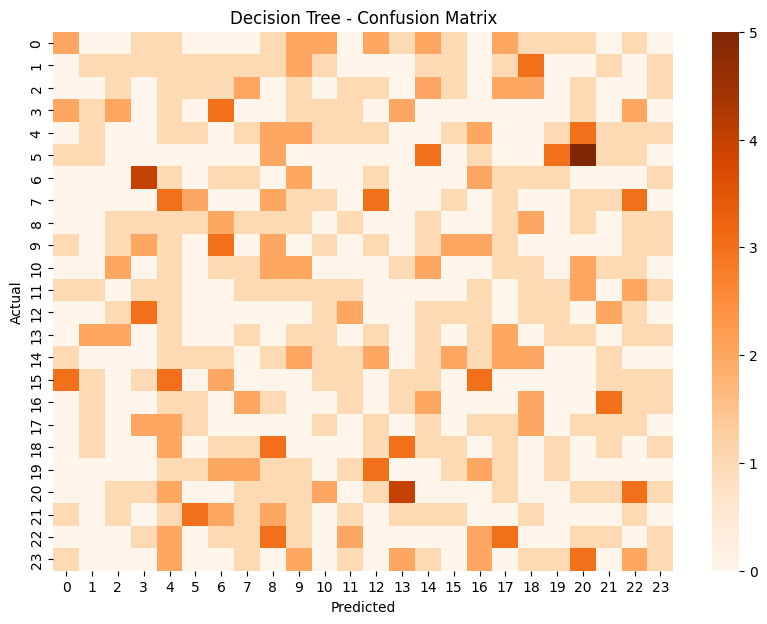

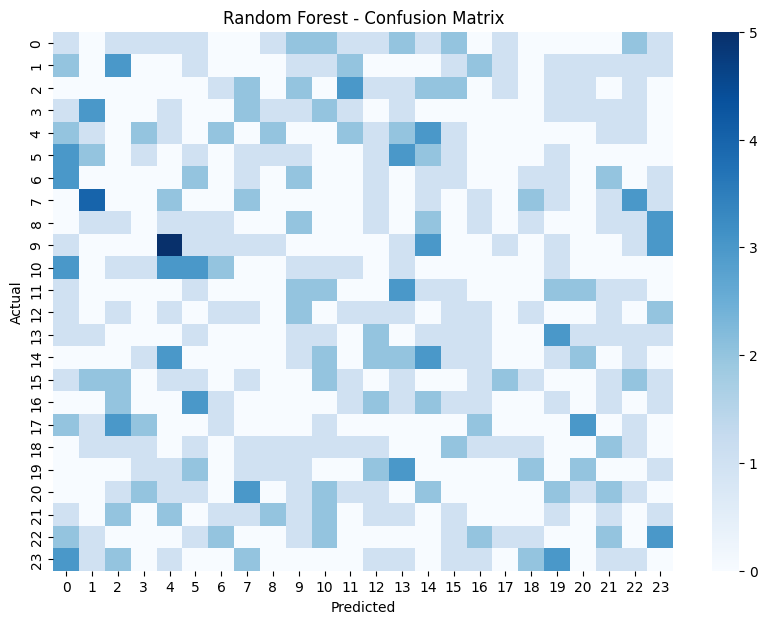

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, dt_pred), cmap="Oranges", annot=False)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, rf_pred), cmap="Blues", annot=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


✅ Accuracy: 3.18 %

📊 Classification Report:

              precision    recall  f1-score   support

       apple       0.04      0.05      0.04        21
      banana       0.00      0.00      0.00        19
   blackgram       0.00      0.00      0.00        18
    chickpea       0.00      0.00      0.00        17
     coconut       0.04      0.05      0.04        21
      coffee       0.05      0.06      0.05        18
      cotton       0.00      0.00      0.00        16
      grapes       0.11      0.11      0.11        19
        jute       0.00      0.00      0.00        17
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.05      0.06      0.05        18
       maize       0.00      0.00      0.00        17
       mango       0.05      0.06      0.06        16
   mothbeans       0.00      0.00      0.00        17
    mungbean       0.12      0.15      0.14        20
   muskmelon       0.00      0.00      0.00        20
      orange       0.07      0.06  

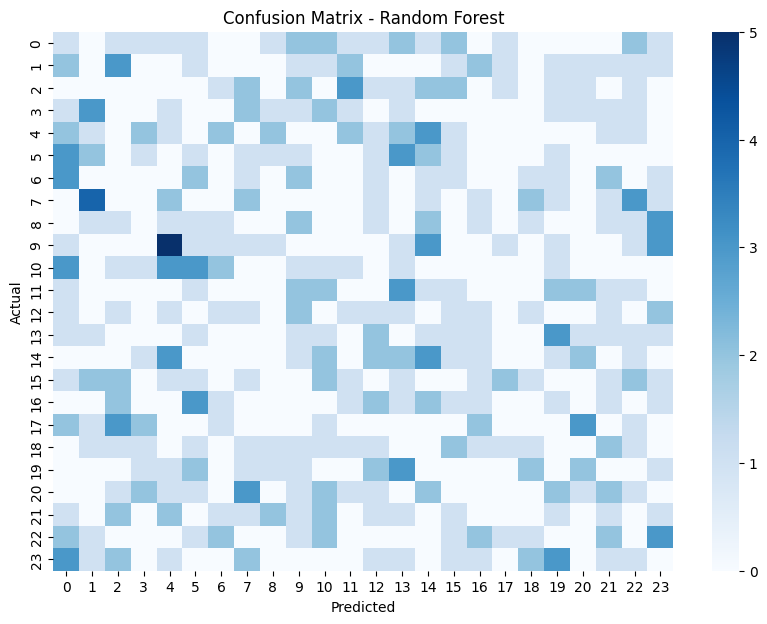

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(acc*100, 2), "%")

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", annot=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, rf_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.head(10)


,precision,recall,f1-score,support
apple,0.035714,0.047619,0.040816,21.0
banana,0.000000,0.000000,0.000000,19.0
blackgram,0.000000,0.000000,0.000000,18.0
chickpea,0.000000,0.000000,0.000000,17.0
coconut,0.041667,0.047619,0.044444,21.0
coffee,0.047619,0.055556,0.051282,18.0
cotton,0.000000,0.000000,0.000000,16.0
grapes,0.105263,0.105263,0.105263,19.0
jute,0.000000,0.000000,0.000000,17.0
kidneybeans,0.000000,0.000000,0.000000,20.0


           precision    recall  f1-score  support
apple       0.035714  0.047619  0.040816     21.0
banana      0.000000  0.000000  0.000000     19.0
blackgram   0.000000  0.000000  0.000000     18.0
chickpea    0.000000  0.000000  0.000000     17.0
coconut     0.041667  0.047619  0.044444     21.0


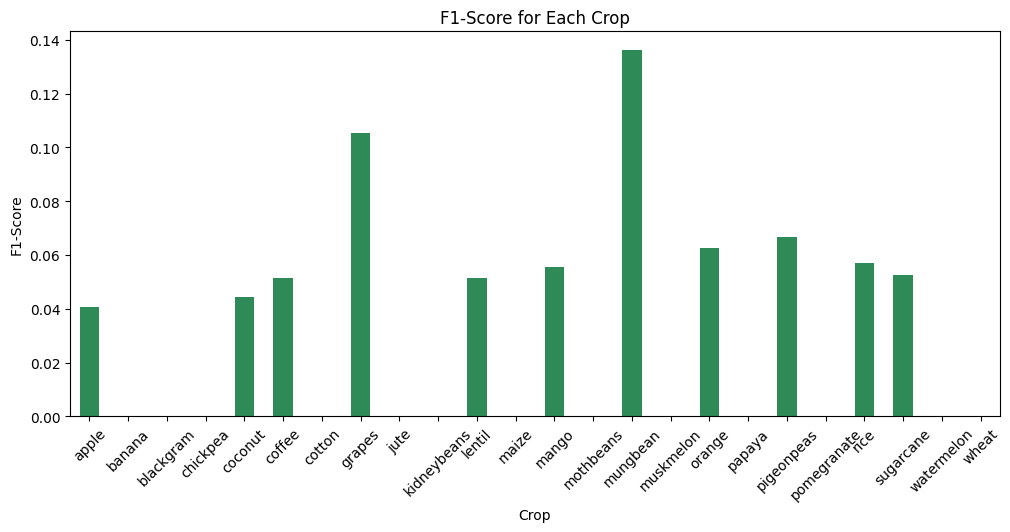

In [25]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

report = classification_report(y_test, rf_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

print(report_df.head())

class_scores = report_df.iloc[:-3]

plt.figure(figsize=(12,5))
class_scores["f1-score"].plot(kind="bar", color="seagreen")

plt.title("F1-Score for Each Crop")
plt.ylabel("F1-Score")
plt.xlabel("Crop")
plt.xticks(rotation=45)
plt.show()
